In [1]:
pwd

'C:\\Users\\still\\OneDrive\\Diverse\\RUC\\MSc Thesis\\Jupyter'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

dataDir = '/Users/still/Downloads/Measurements - Split/'
runA1 = pd.read_csv(dataDir + '/nest/3rd run/runA1.csv', sep=';', decimal= ',')
runA2 = pd.read_csv(dataDir + '/nest/3rd run/runA2.csv', sep=';', decimal= ',')
runA3 = pd.read_csv(dataDir + '/nest/3rd run/runA3.csv', sep=';', decimal= ',')
runA4 = pd.read_csv(dataDir + '/nest/3rd run/runA4.csv', sep=';', decimal= ',')
runA5 = pd.read_csv(dataDir + '/nest/3rd run/runA5.csv', sep=';', decimal= ',')
runA6 = pd.read_csv(dataDir + '/nest/3rd run/runA6.csv', sep=';', decimal= ',')

<Axes: xlabel='minutes', ylabel='SPD33.CH1_Power'>

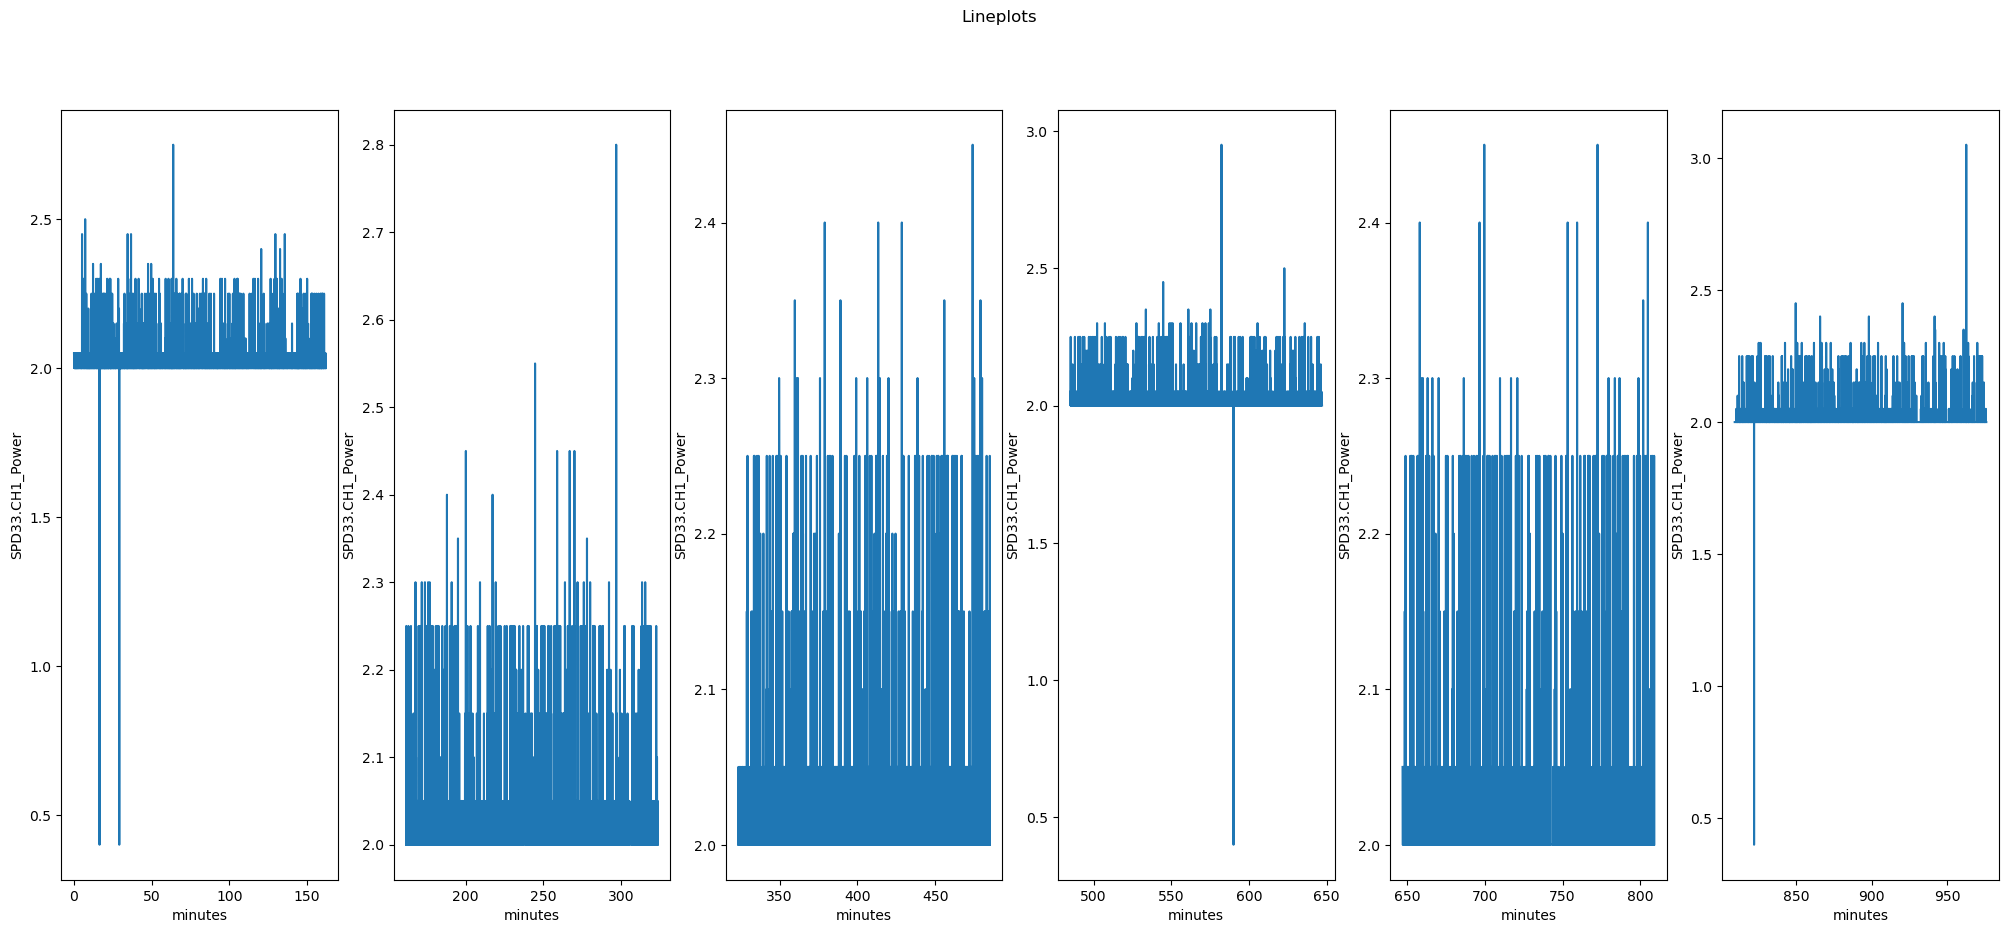

In [3]:
# plot data to check for errors
fig, axes = plt.subplots(1, 6, figsize=(25, 10))
fig.suptitle('Lineplots')
sns.lineplot(ax=axes[0], data=runA1, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[1], data=runA2, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[2], data=runA3, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[3], data=runA4, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[4], data=runA5, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[5], data=runA6, x='minutes', y='SPD33.CH1_Power')

<Axes: xlabel='minutes', ylabel='SPD33.CH1_Power'>

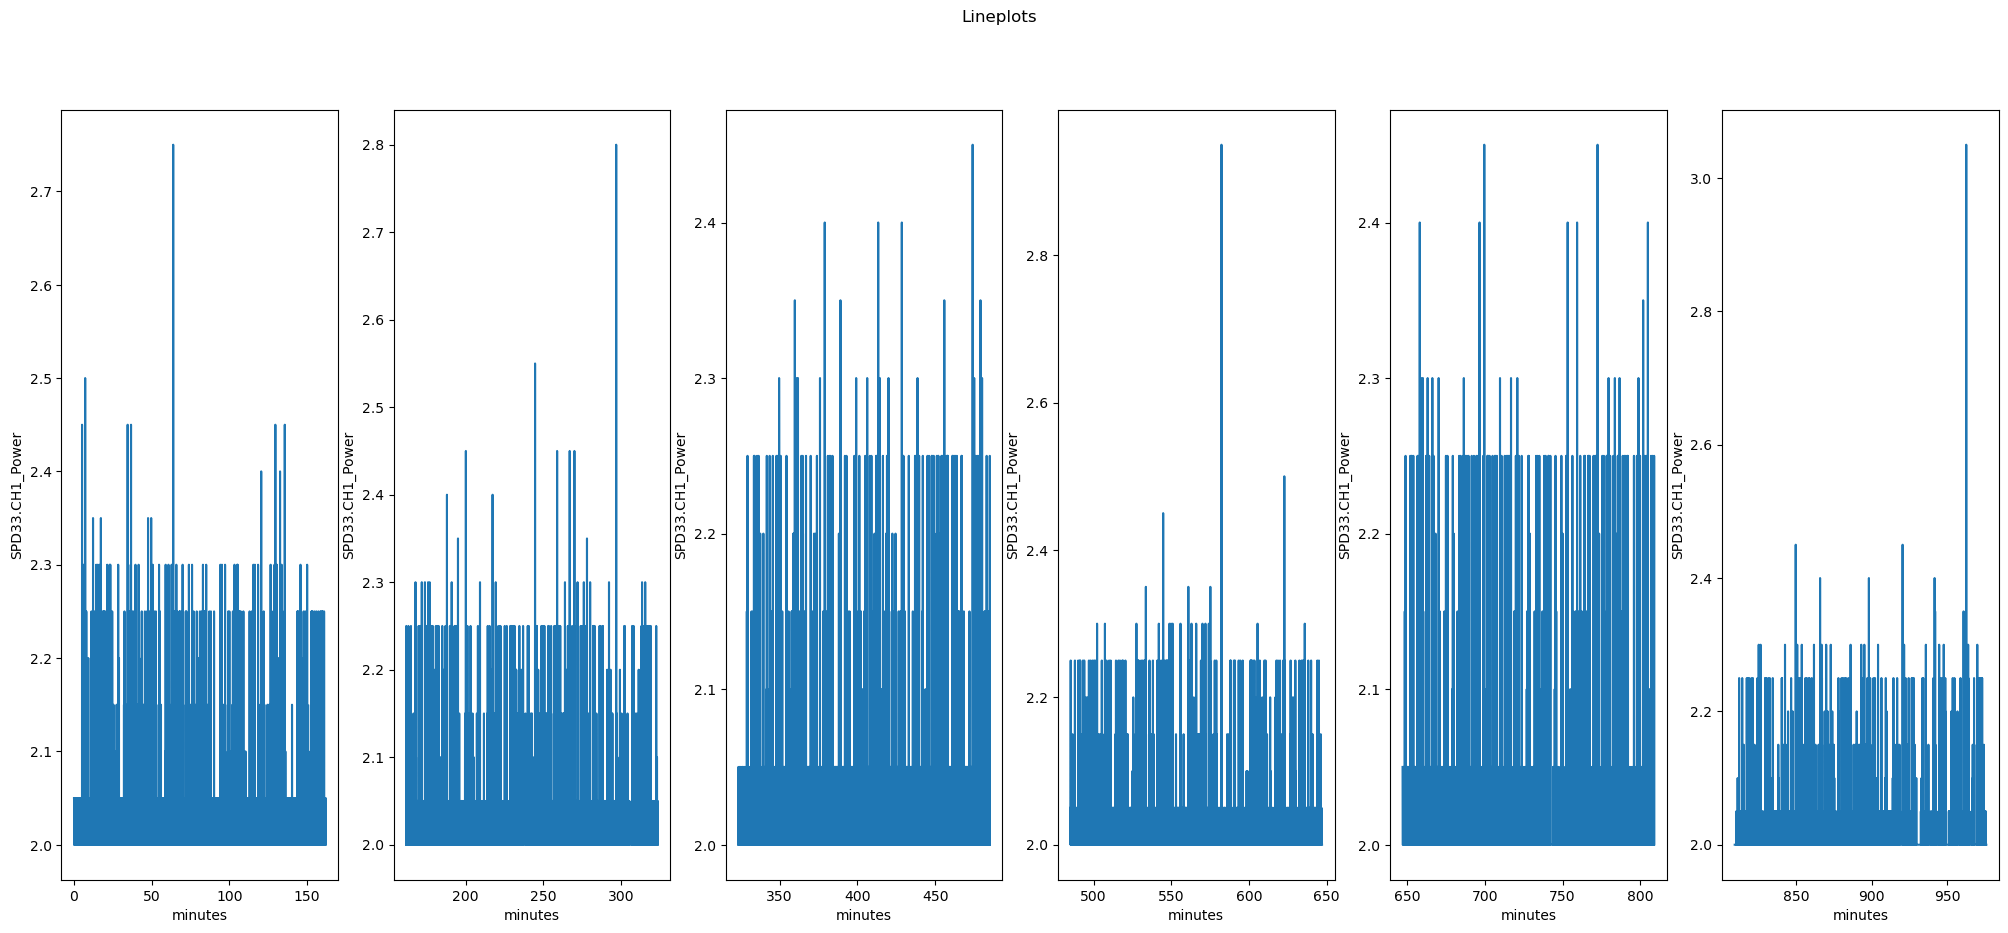

In [4]:
runA1 = runA1[runA1['SPD33.CH1_Power'] >= 2.0]
runA2 = runA2[runA2['SPD33.CH1_Power'] >= 2.0]
runA3 = runA3[runA3['SPD33.CH1_Power'] >= 2.0]
runA4 = runA4[runA4['SPD33.CH1_Power'] >= 2.0]
runA5 = runA5[runA5['SPD33.CH1_Power'] >= 2.0]
runA6 = runA6[runA6['SPD33.CH1_Power'] >= 2.0]

# plot data to check for errors
fig, axes = plt.subplots(1, 6, figsize=(25, 10))
fig.suptitle('Lineplots')
sns.lineplot(ax=axes[0], data=runA1, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[1], data=runA2, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[2], data=runA3, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[3], data=runA4, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[4], data=runA5, x='minutes', y='SPD33.CH1_Power')
sns.lineplot(ax=axes[5], data=runA6, x='minutes', y='SPD33.CH1_Power')


In [5]:
areaA1 = np.trapz(runA1['SPD33.CH1_Power'], runA1['minutes'])
areaA2 = np.trapz(runA2['SPD33.CH1_Power'], runA2['minutes'])
areaA3 = np.trapz(runA3['SPD33.CH1_Power'], runA3['minutes'])
areaA4 = np.trapz(runA4['SPD33.CH1_Power'], runA4['minutes'])
areaA5 = np.trapz(runA5['SPD33.CH1_Power'], runA5['minutes'])
areaA6 = np.trapz(runA6['SPD33.CH1_Power'], runA6['minutes'])

areaA1, areaA2, areaA3, areaA4, areaA5, areaA6

(326.533423325925,
 324.72260632749993,
 327.2143187974998,
 326.8542109025002,
 325.4949235025002,
 335.2645655575002)

In [6]:
df = pd.DataFrame([areaA1, areaA2, areaA3, areaA4, areaA5, areaA6])  
#sns.boxplot(data=df)
df['run'] = df.index
df.rename(columns={0:'area'}, inplace=True)
df

,area,run
0,326.533423,0
1,324.722606,1
2,327.214319,2
3,326.854211,3
4,325.494924,4
5,335.264566,5


<Axes: xlabel='run', ylabel='area'>

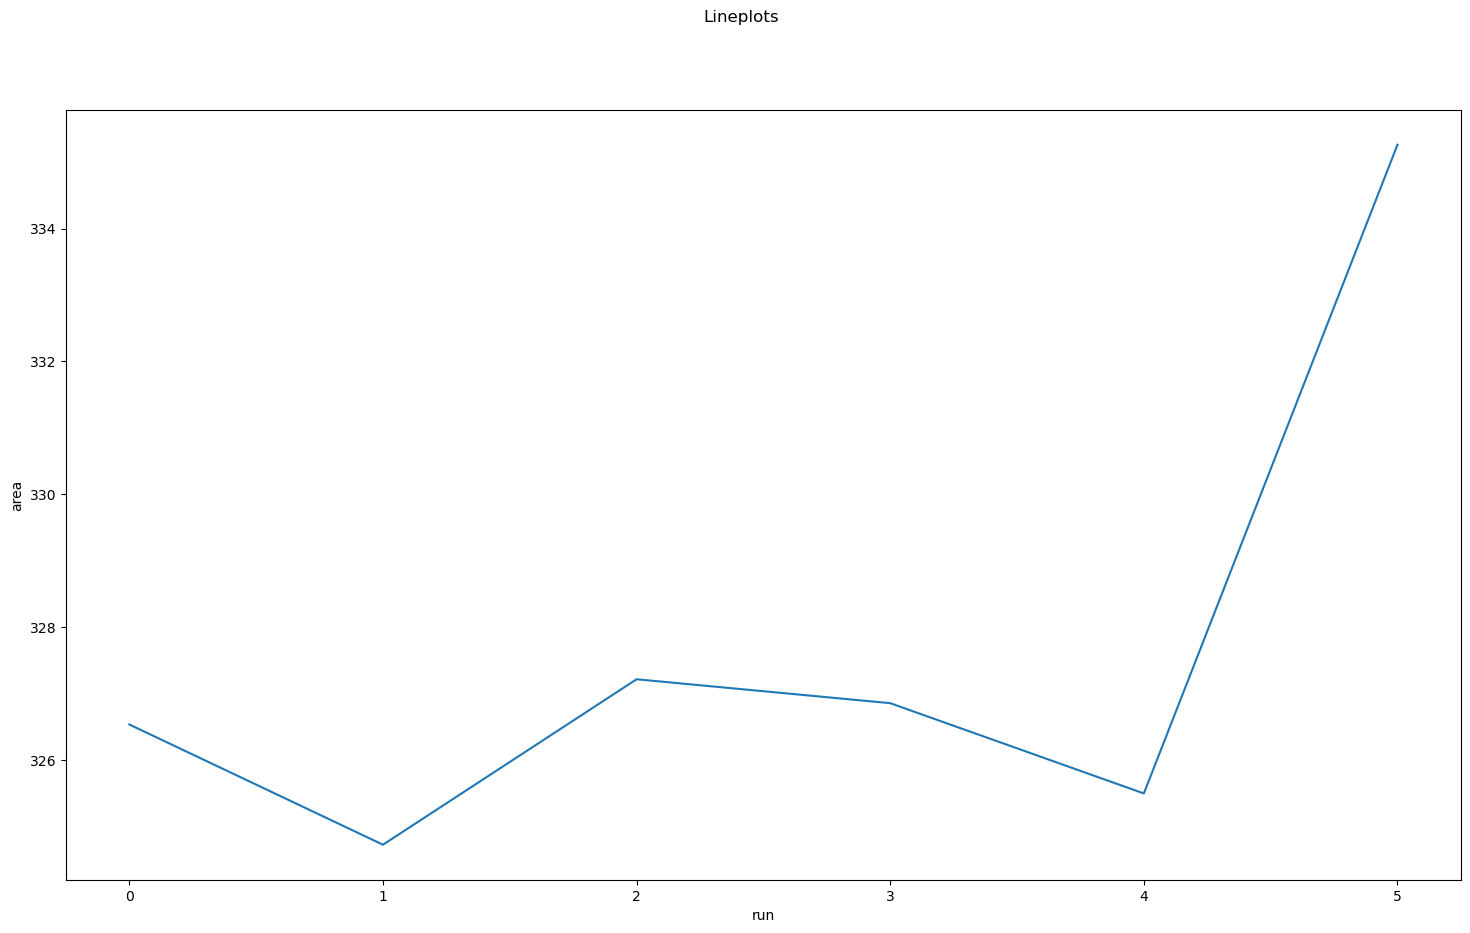

In [7]:
# plot areas to check for patterns
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
fig.suptitle('Lineplots')
sns.lineplot(data=df, x='run', y='area')

<Axes: xlabel='area', ylabel='Count'>

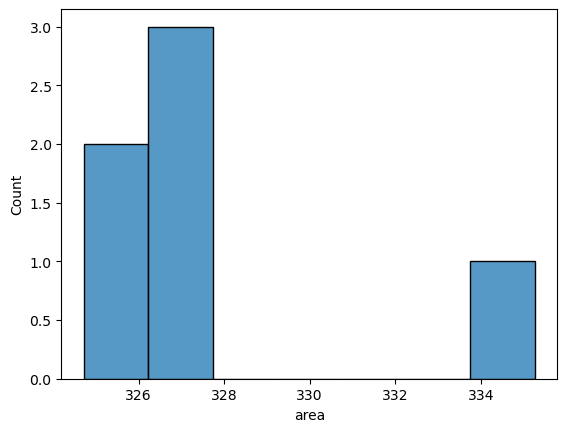

In [8]:
# histogram of all calculated areas 
sns.histplot(data=df, x='area')

Text(0.5, 9.444444444444438, 'Energy Consumption (J)')

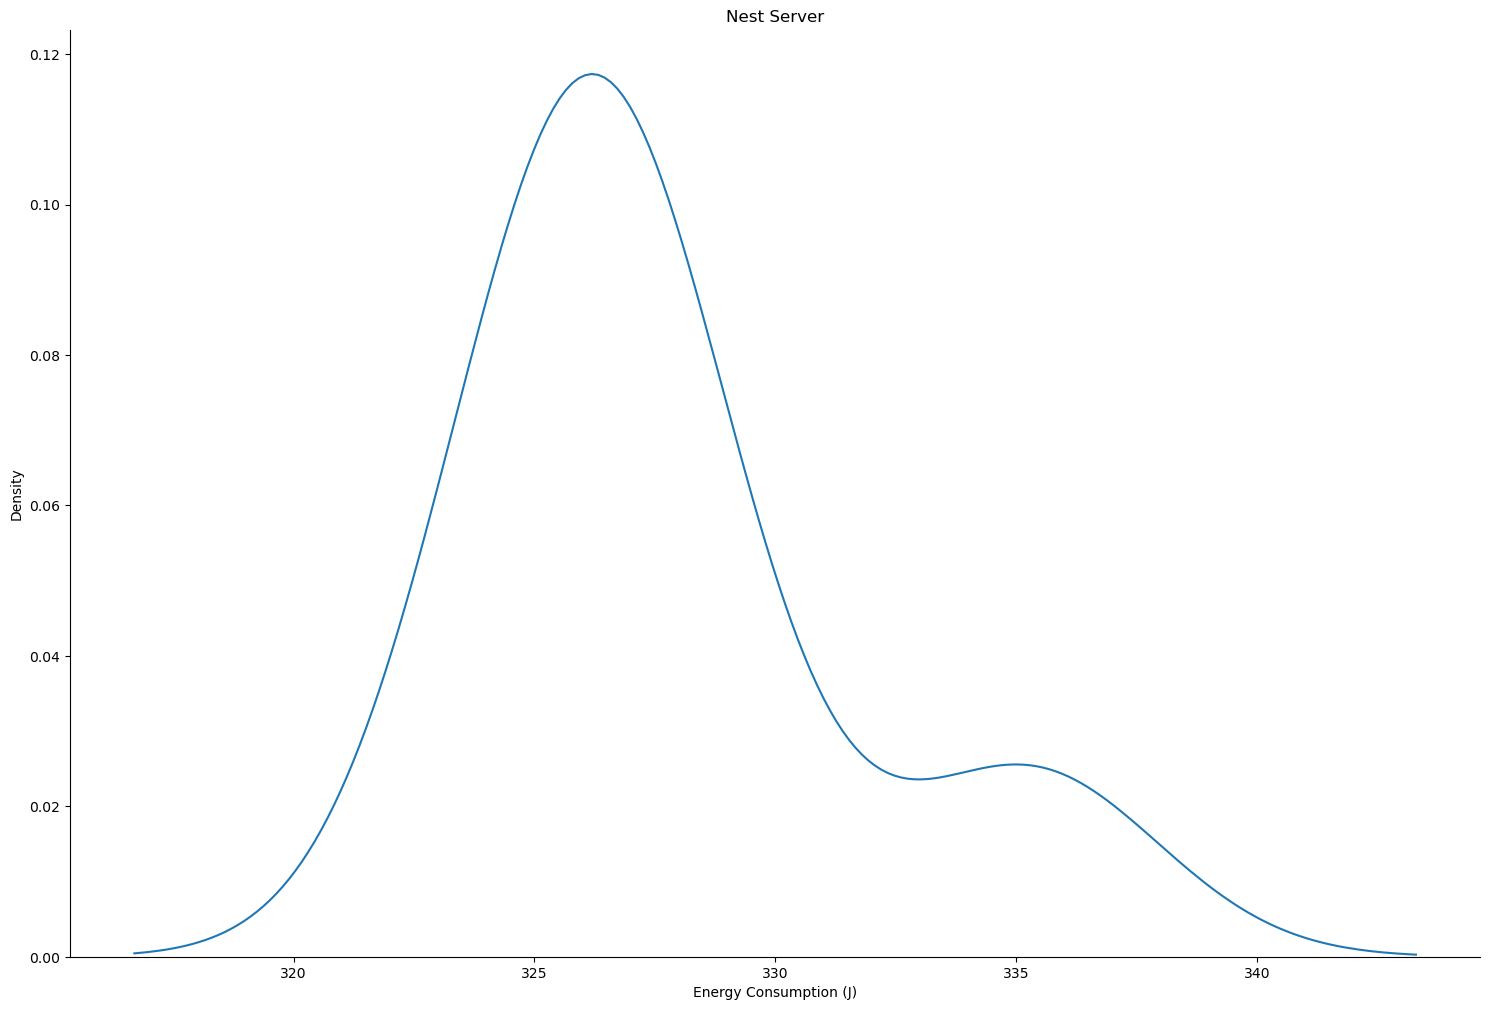

In [11]:
sns.displot(data=df, x='area', kind='kde', height=10, aspect=1.5)
plt.title("Nest Server")
plt.xlabel("Energy Consumption (J)")

<Axes: xlabel='area'>

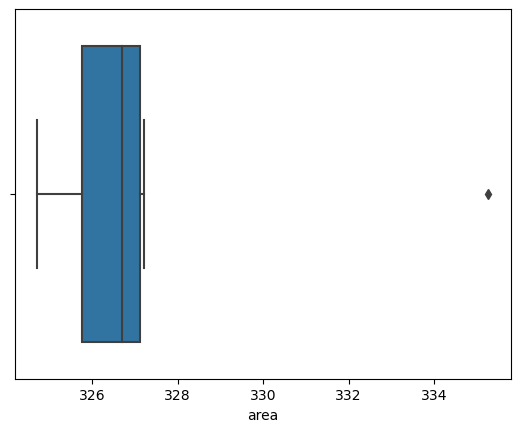

In [12]:
sns.boxplot(data=df, x='area')

In [14]:
df.to_csv('/Users/still/Downloads/Exported/nestServerArea.csv', index=False)